In [2]:
import pandas as pd 
from sklearn.datasets import load_digits

In [4]:
dataset=load_digits()
dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [5]:
dataset.data.shape

(1797, 64)

In [6]:
dataset.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

now to represent it into the plot graph we need to convert it into 2-d array using reshape

<Figure size 640x480 with 0 Axes>

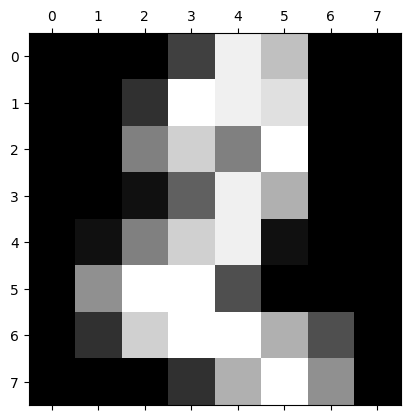

In [11]:
from matplotlib import pyplot as plt 
%matplotlib inline
plt.gray()
plt.matshow(dataset.data[2].reshape(8,8))


In [12]:
import numpy as np
np.unique(dataset.target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [15]:
df=pd.DataFrame(dataset.data,columns=dataset.feature_names)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [17]:
x=df
y=dataset.target
print(y)

[0 1 2 ... 8 9 8]


now to scale the values in the matriix for better calculation use standardscaler this would scale the values into a range (-1,1)whcih is noticible easily

In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
print(x_scaled)

[[ 0.         -0.33501649 -0.04308102 ... -1.14664746 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  0.54856067 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  1.56568555  1.6951369
  -0.19600752]
 ...
 [ 0.         -0.33501649 -0.88456568 ... -0.12952258 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -0.67419451 ...  0.8876023  -0.5056698
  -0.19600752]
 [ 0.         -0.33501649  1.00877481 ...  0.8876023  -0.26113572
  -0.19600752]]


In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=30)

In [20]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9722222222222222

using the pca we can reduce the dimensionality of the matrix
in below inside parameter we have pass 0.95 which is only using the 0.95% of useful data as input and create the new dimension

In [23]:
x.shape

(1797, 64)

In [22]:
from sklearn.decomposition import PCA
pca=PCA(0.95)
x_pca=pca.fit_transform(x)
x_pca.shape

(1797, 29)

using the .explained_variance_ratio we can check which column is containing how much percentage of the valuable data

In [27]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863, 0.01773855, 0.01467101,
       0.01409716, 0.01318589, 0.01248138, 0.01017718, 0.00905617,
       0.00889538, 0.00797123, 0.00767493, 0.00722904, 0.00695889,
       0.00596081, 0.00575615, 0.00515158, 0.0048954 ])

In [28]:
pca.n_components_

29

In [29]:
x_train_pca,x_test_pca,y_train_pca,y_test_pca=train_test_split(x_pca,y,test_size=0.2,random_state=30)

In [30]:
model=LogisticRegression(max_iter=1000)
model.fit(x_train_pca,y_train)
model.score(x_test_pca,y_test)

0.9694444444444444

reducing the dimension furthur can result into  less accurate answer

In [32]:
pca=PCA(n_components=2)
x_pca=pca.fit_transform(x)
x_pca.shape

(1797, 2)

In [33]:
print(x_pca)

[[ -1.25946931  21.27488117]
 [  7.95760662 -20.76869757]
 [  6.99192815  -9.9559853 ]
 ...
 [ 10.80128447  -6.96025294]
 [ -4.8721008   12.42395681]
 [ -0.34438424   6.36554799]]


In [34]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771])

In [36]:
x_train_pca,x_test_pca,y_train_pca,y_test_pca=train_test_split(x_pca,y,test_size=0.2,random_state=30)

our accuracy got reduced due to reduce the dimensionality

In [37]:
model=LogisticRegression(max_iter=1000)
model.fit(x_train_pca,y_train)
model.score(x_test_pca,y_test)

0.6083333333333333